In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
n=1000
data=pd.DataFrame({
    'A'  :   np.random.randn(n),
    'B'  :   1.5+2.5*np.random.rand(n),
    'C'  :   np.random.uniform(5,32,n)
    })

data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,0.015012,2.687976,18.693540
std,1.018295,0.729997,7.501017
min,-3.127050,1.501376,5.043853
25%,-0.669765,2.023930,12.699487
50%,0.030756,2.673857,18.755274
75%,0.721243,3.314516,24.852645
max,3.136650,3.997451,31.982369


#  Agregacion de datos

In [3]:
gender=["Male", 'Female']
income=['Poor', 'Middle', 'Rich']


In [4]:
n=500

gender_data=[]
income_data=[]

for i in range(0,n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))


In [5]:
# N (me, S)     -> m +s*Z            Z=DISTN
height=np.round(165+10*np.random.randn(n),2)
weight=np.round(65+25*np.random.randn(n),2)
age=np.ceil(26+6*np.random.randn(n))
age=age.astype(int)
income=np.round(18000+3500*np.random.randn(n),2)


In [6]:
data=pd.DataFrame({
    'Gender': gender_data,
    'Ec. Status': income_data,
    'Height': height,
    'Weight':weight,
    'Age': age,
    'Income':income
    
})

grouped_gender=data.groupby('Gender')
grouped_gender.groups
data

,Gender,Ec. Status,Height,Weight,Age,Income
0,Female,Poor,173.09,115.56,28,19460.60
1,Male,Rich,148.03,40.17,23,18003.48
2,Female,Poor,171.31,49.40,25,15059.68
3,Male,Middle,174.44,88.46,16,17183.26
4,Male,Middle,164.30,53.89,22,13531.85
...,...,...,...,...,...,...
495,Female,Rich,167.41,74.63,21,17183.13
496,Female,Poor,183.68,53.66,20,18842.21
497,Male,Middle,164.80,55.35,19,19655.70
498,Male,Rich,158.54,67.07,32,20657.16


In [7]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Ec. Status  Height  Weight  Age    Income
0    Female       Poor  173.09  115.56   28  19460.60
2    Female       Poor  171.31   49.40   25  15059.68
10   Female       Rich  185.79   99.83   16  13622.21
12   Female       Poor  151.28  101.11   21  16769.41
14   Female       Poor  163.29   46.95   23  21255.34
..      ...        ...     ...     ...  ...       ...
487  Female     Middle  166.23   66.19   19  16501.31
489  Female     Middle  156.85   59.14   19  16434.18
493  Female       Poor  157.06   27.88   41  20745.53
495  Female       Rich  167.41   74.63   21  17183.13
496  Female       Poor  183.68   53.66   20  18842.21

[240 rows x 6 columns]
Male
    Gender Ec. Status  Height  Weight  Age    Income
1     Male       Rich  148.03   40.17   23  18003.48
3     Male     Middle  174.44   88.46   16  17183.26
4     Male     Middle  164.30   53.89   22  13531.85
5     Male     Middle  149.49   65.05   26  21403.95
6     Male       Rich  179.49   66.60   21  11970.9

In [8]:
grouped_gender.get_group('Female')

,Gender,Ec. Status,Height,Weight,Age,Income
0,Female,Poor,173.09,115.56,28,19460.60
2,Female,Poor,171.31,49.40,25,15059.68
10,Female,Rich,185.79,99.83,16,13622.21
12,Female,Poor,151.28,101.11,21,16769.41
14,Female,Poor,163.29,46.95,23,21255.34
...,...,...,...,...,...,...
487,Female,Middle,166.23,66.19,19,16501.31
489,Female,Middle,156.85,59.14,19,16434.18
493,Female,Poor,157.06,27.88,41,20745.53
495,Female,Rich,167.41,74.63,21,17183.13


In [9]:
double_group=data.groupby(['Gender', 'Ec. Status'])

In [10]:
for names, groups in double_group:
    print (names)
    print (groups)

('Female', 'Middle')
     Gender Ec. Status  Height  Weight  Age    Income
21   Female     Middle  176.28   43.98   24  24242.07
23   Female     Middle  164.75   86.23   24  11441.51
39   Female     Middle  160.63   98.79   30  16286.56
46   Female     Middle  164.25   44.48   26  19720.56
70   Female     Middle  156.59   10.37   24  18093.36
..      ...        ...     ...     ...  ...       ...
475  Female     Middle  171.84   88.88   20  16593.02
476  Female     Middle  159.05   66.31   31  11862.18
482  Female     Middle  156.00   62.17   32  15429.85
487  Female     Middle  166.23   66.19   19  16501.31
489  Female     Middle  156.85   59.14   19  16434.18

[98 rows x 6 columns]
('Female', 'Poor')
     Gender Ec. Status  Height  Weight  Age    Income
0    Female       Poor  173.09  115.56   28  19460.60
2    Female       Poor  171.31   49.40   25  15059.68
12   Female       Poor  151.28  101.11   21  16769.41
14   Female       Poor  163.29   46.95   23  21255.34
15   Female       P

#  Operaciones datos agrupados

In [11]:
double_group.sum()

Height   Weight   Age      Income
Gender Ec. Status                                     
Female Middle      16238.58  6099.40  2503  1701752.29
       Poor        11891.43  4807.13  1940  1285398.67
       Rich        11651.74  4842.59  1875  1242915.95
Male   Middle      13287.73  5029.17  2207  1442817.42
       Poor        12963.58  5234.04  2082  1395796.36
       Rich        16728.69  6680.36  2623  1763273.46

In [12]:
double_group.size()

Gender  Ec. Status
Female  Middle         98
        Poor           72
        Rich           70
Male    Middle         81
        Poor           78
        Rich          101
dtype: int64

In [13]:
double_group.describe()

Height                                                    \
                   count        mean        std     min       25%      50%   
Gender Ec. Status                                                            
Female Middle       98.0  165.699796   9.155300  139.56  160.0200  165.245   
       Poor         72.0  165.158750   9.427768  146.80  159.2900  164.075   
       Rich         70.0  166.453429  11.395434  138.51  158.8325  167.950   
Male   Middle       81.0  164.046049   9.881356  138.95  157.2600  164.420   
       Poor         78.0  166.199744   9.077676  144.50  160.2325  166.975   
       Rich        101.0  165.630594   9.495835  142.96  159.4600  165.230   

                                    Weight             ...    Age        \
                        75%     max  count       mean  ...    75%   max   
Gender Ec. Status                                      ...                
Female Middle      172.0200  188.03   98.0  62.238776  ...  30.00  38.0   
       Poor        170.6075  195.86   72.0  66.765694  ...  31.00  41.0   
       Rich        173.3325  196.14   70.0  69.179857  ...  31.00  42.0   
Male   Middle      170.5800  191.07   81.0  62.088519  ...  31.00  38.0   
       Poor        172.2475  185.62   78.0  67.103077  ...  30.75  43.0   
       Rich        172.1300  188.50  101.0  66.142178  ...  30.00  39.0   

                  Income                                                   \
                   count          mean          std       min         25%   
Gender Ec. Status                                                           
Female Middle       98.0  17364.819286  3487.611996   8818.94  15419.2475   
       Poor         72.0  17852.759306  3170.455560  11298.97  15699.5425   
       Rich         70.0  17755.942143  3862.400090   7623.82  15220.3150   
Male   Middle       81.0  17812.560741  3122.811992  10358.03  15806.1100   
       Poor         78.0  17894.825128  3245.152799   8557.05  15813.9375   
       Rich        101.0  17458.153069  3192.555138   9007.88  15037.5200   

                                                    
                         50%         75%       max  
Gender Ec. Status                                   
Female Middle      17284.295  19632.3200  24771.03  
       Poor        18257.170  20548.3250  24963.45  
       Rich        18084.645  20619.7900  28315.43  
Male   Middle      18088.080  20307.0800  24569.51  
       Poor        17796.950  20187.5975  24032.15  
       Rich        17559.250  19975.3100  24474.41  

[6 rows x 32 columns]

In [68]:
grouped_income=double_group['Income']
grouped_income.describe()

count          mean          std       min         25%  \
Gender Ec. Status                                                           
Female Middle       77.0  18042.071558  3600.747188  10166.74  15362.6900   
       Poor         92.0  17720.947174  3811.088288   8336.38  14904.4275   
       Rich         73.0  18374.572329  3618.034377   9782.11  15788.9700   
Male   Middle       74.0  18179.062432  3458.512009  10741.60  15620.1875   
       Poor         96.0  18433.331667  3550.182503  10588.95  16316.8025   
       Rich         88.0  18183.126250  3852.046804   9125.20  15647.2375   

                         50%         75%       max  
Gender Ec. Status                                   
Female Middle      18322.560  20834.5700  25254.05  
       Poor        17678.355  20418.1475  27113.49  
       Rich        18337.280  20924.9000  28586.72  
Male   Middle      17860.265  20305.8900  26208.84  
       Poor        18601.635  20647.3825  26171.21  
       Rich        18343.770  20692.9625  29002.27

In [14]:
double_group.aggregate(
{
    'Income':np.sum,
    'Age': np.mean,
    'Height': np.std
    
})

Income        Age     Height
Gender Ec. Status                                  
Female Middle      1701752.29  25.540816   9.155300
       Poor        1285398.67  26.944444   9.427768
       Rich        1242915.95  26.785714  11.395434
Male   Middle      1442817.42  27.246914   9.881356
       Poor        1395796.36  26.692308   9.077676
       Rich        1763273.46  25.970297   9.495835

In [15]:
double_group.aggregate({
    'Age': np.mean,
    'Height': lambda h: np.mean(h)/np.std(h)
    
})

Age     Height
Gender Ec. Status                      
Female Middle      25.540816  18.191837
       Poor        26.944444  17.641268
       Rich        26.785714  14.712496
Male   Middle      27.246914  16.705010
       Poor        26.692308  18.427126
       Rich        25.970297  17.529442

In [73]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                          Weight             \
                        sum        mean        std      sum       mean   
Gender Ec. Status                                                        
Female Middle      12628.50  164.006494   9.997498  5271.68  68.463377   
       Poor        15270.56  165.984348   9.976786  6199.92  67.390435   
       Rich        12002.85  164.422603  10.703349  4636.64  63.515616   
Male   Middle      11961.01  161.635270   9.330222  4653.20  62.881081   
       Poor        15787.38  164.451875   9.178006  6285.12  65.470000   
       Rich        14588.79  165.781705   8.953114  5480.69  62.280568   

                               Age                           Income  \
                         std   sum       mean       std         sum   
Gender Ec. Status                                                     
Female Middle      26.571167  2048  26.597403  5.432019  1389239.51   
       Poor        25.391039  2447  26.597826  6.450249  1630327.14   
       Rich        24.241549  1925  26.369863  5.697238  1341343.78   
Male   Middle      25.443615  2023  27.337838  6.255468  1345250.62   
       Poor        23.386062  2569  26.760417  5.761478  1769599.84   
       Rich        25.109660  2256  25.636364  6.733314  1600115.11   

                                              
                           mean          std  
Gender Ec. Status                             
Female Middle      18042.071558  3600.747188  
       Poor        17720.947174  3811.088288  
       Rich        18374.572329  3618.034377  
Male   Middle      18179.062432  3458.512009  
       Poor        18433.331667  3550.182503  
       Rich        18183.126250  3852.046804

In [16]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                    <lambda>  <lambda>  <lambda>  <lambda>
Gender Ec. Status                                         
Female Middle      18.191837  2.218887  4.521994  5.004599
       Poor        17.641268  2.585917  4.506610  5.670492
       Rich        14.712496  2.687218  4.675171  4.630319
Male   Middle      16.705010  2.590979  4.828686  5.739553
       Poor        18.427126  2.870174  4.750454  5.550016
       Rich        17.529442  2.586854  4.263840  5.495669

 # Filtrado de datos

In [17]:
double_group['Age'].filter(lambda x: x.sum()>2400)

1      23
6      21
8      30
11     17
13     29
       ..
486    32
487    19
489    19
492    20
498    32
Name: Age, Length: 199, dtype: int32

# Transformación de variables

In [20]:
zscore= lambda x: (x-x.mean())/x.std()
z_group=double_group.transform(zscore)

(array([ 10.,  30.,  53.,  87.,  87., 111.,  72.,  33.,  15.,   2.]),
 array([-2.56127835, -2.01678749, -1.47229663, -0.92780576, -0.3833149 ,
         0.16117596,  0.70566683,  1.25015769,  1.79464855,  2.33913942,
         2.88363028]),
 <a list of 10 Patch objects>)

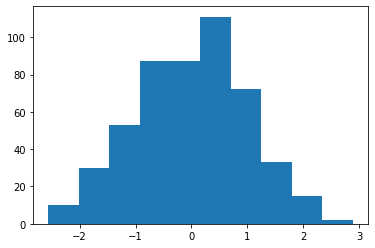

In [22]:
import matplotlib.pyplot as plt
plt.hist(z_group['Age'])

In [25]:
fill_na_mean=lambda x: x.fillna(x.mean())
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,173.09,115.56,28,19460.60
1,148.03,40.17,23,18003.48
2,171.31,49.40,25,15059.68
3,174.44,88.46,16,17183.26
4,164.30,53.89,22,13531.85
...,...,...,...,...
495,167.41,74.63,21,17183.13
496,183.68,53.66,20,18842.21
497,164.80,55.35,19,19655.70
498,158.54,67.07,32,20657.16


In [32]:
## OPERACIONES UTILES PARA DATOS 
# PRimero
double_group.head(1)
#Ultimo
double_group.tail(1)

#Medio llamando a una fila
double_group.nth(20)



Height  Weight  Age    Income
Gender Ec. Status                               
Female Middle      175.91   19.86   24  19504.85
       Poor        162.70   20.05   31  11908.52
       Rich        164.28   33.60   24  19251.99
Male   Middle      146.03   61.80   25  19165.01
       Poor        162.08  104.65   24  22208.14
       Rich        188.50   75.48   22  16329.46

In [40]:
data_sorted=data.sort_values(['Age', 'Income'])
data_sorted.head(20)
age_grouped=data_sorted.groupby('Gender')
age_grouped.tail(3)

,Gender,Ec. Status,Height,Weight,Age,Income
182,Male,Rich,174.12,69.71,39,15059.24
366,Female,Poor,156.59,75.85,39,18154.70
406,Male,Poor,169.81,66.63,39,20975.59
493,Female,Poor,157.06,27.88,41,20745.53
91,Female,Rich,160.35,107.34,42,13817.95
452,Male,Poor,179.29,122.78,43,14298.14
